## Exploration

In [1]:
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['legend.fontsize']=15
plt.rcParams['axes.labelsize']=15
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['legend.frameon']=False
warnings.filterwarnings("ignore")

|List	|Name |Meaning|
|---|--- |---|
|pl_name	|Planet Name| 行星名称
|hostname	|Host Name|行星所属恒星名称
|discoverymethod	|Discovery Method|发现该行星的方法
|disc_year	|Discovery Year|发现年
|disc_facility	|Discovery Facility|发现仪器
|pl_orbper	|Orbital Period [days]|公转一圈时长（单位：地球天）
|pl_rade	|Planet Radius [Earth Radius]|行星半径（单位：相对地球半径）
|pl_bmasse|	Planet Mass or Mass*sin(i) [Earth Mass]|行星质量（单位：相对地球质量）
|pl_orbeccen	|Eccentricity| 行星偏心率（描述行星椭圆轨道与其焦点关系的物理量）
|pl_eqt	|Equilibrium Temperature [K]| 行星平衡稳定温度（单位：开尔文）
|st_spectype	|Spectral Type| 恒星的光谱类型（用以对恒星的分类）
|st_teff	|Stellar Effective Temperature [K]| 恒星有效温度（单位：开尔文）
|st_rad	|Stellar Radius [Solar Radius]| 恒星半径（单位：相对太阳半径）
|st_mass	|Stellar Mass [Solar mass]| 恒星质量（单位：相对太阳质量）
|st_logg|	Stellar Surface Gravity [log10(cm/s**2)]| 恒星表面重力加速度
|glat|	Galactic Latitude [deg]| 银河系纬度
|glon|	Galactic Longitude [deg]| 银河系经度
|sy_dist|	Distance [pc]| 相对恒星的距离

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('https://labfile.oss.aliyuncs.com/courses/3023/NASA_planets.xls')
df.head()

,loc_rowid,pl_name,hostname,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_bmasse,pl_orbeccen,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_logg,glat,glon,sy_dist
0,1,11 Com b,11 Com,Radial Velocity,2007,Xinglong Station,326.03000,12.1,6165.6000,0.231,NaN,G8 III,4742.0,19.00,2.70,2.31,78.28055,264.14070,93.1846
1,2,11 UMi b,11 UMi,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,12.3,4684.8142,0.080,NaN,K4 III,4213.0,29.79,2.78,1.93,41.04441,108.71900,125.3210
2,3,14 And b,14 And,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,12.9,1525.5000,0.000,NaN,K0 III,4813.0,11.00,2.20,2.63,-21.05067,106.41160,75.4392
3,4,14 Her b,14 Her,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,12.9,1481.0878,0.370,NaN,K0 V,5338.0,0.93,0.90,4.45,46.94491,69.17043,17.9323
4,5,16 Cyg B b,16 Cyg B,Radial Velocity,1996,Multiple Observatories,798.50000,13.5,565.7374,0.680,NaN,G3 V,5750.0,1.13,1.08,4.36,13.20426,83.33649,21.1397


### New planets per year

Text(0.5, 1.0, 'Discovered Planets by Year')

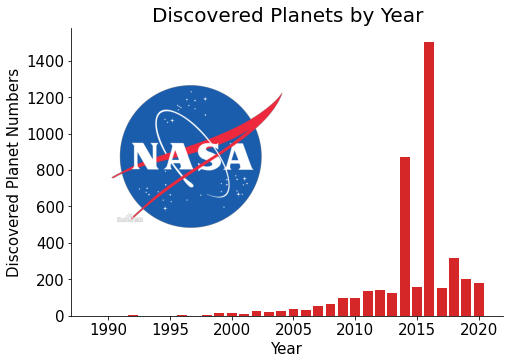

In [4]:
import matplotlib.image as imgplt
plt.rcParams['figure.figsize']=(6,4)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1],aspect='auto')
ax_im=fig.add_axes([.04,.3,.5,.5],aspect='auto')
ax_im.axis('off')

data=df.groupby(['disc_year']).size()
ax.bar(data.index,data,color='tab:red')

img=imgplt.imread(fname='https://labfile.oss.aliyuncs.com/courses/3023/NASA.png')
ax_im.imshow(img)

ax.set_xlabel('Year')
ax.set_ylabel('Discovered Planet Numbers')
ax.set_title('Discovered Planets by Year')

### Discovery by Institutions

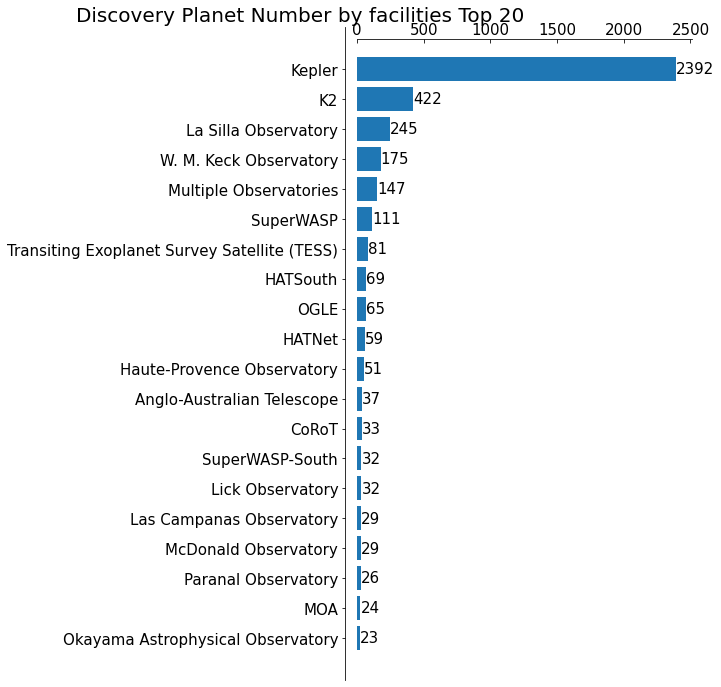

In [10]:
plt.rcParams['figure.figsize']=(6,12)
top_num=20
data=df.groupby(['disc_facility']).size().sort_values(ascending=False)
data=data[:top_num].sort_values()
plt.barh(data.index,data)
plt.title(f'Discovery Planet Number by facilities Top {top_num}',ha='right')

ax=plt.gca()
ax.spines['bottom'].set_position(('data',len(data)))
ax.spines['left'].set_position(('data',-90))
ax.tick_params(axis='x',pad=-20)

for y,width in zip(range(len(data.index)),data):
    plt.text(width+.5,y,width,fontsize=15,va='center')

|Projects |Detail |Numbers
|--- |--- |---
|Kepler       |开普勒太空望远镜，是世界首个用于探测太阳系外类地行星的飞行器。 | 2392
|K2           |K2 计划|422
|La Silla Observatory  |拉西拉天文台（位于智利阿塔卡马沙漠的郊区）| 245
|W. M. Keck Observatory |W·M·凯克天文台（位于夏威夷岛上，拥有世界上最大的两个光学/红外望远镜） |   175
|Multiple Observatories  |多家合作天文台组织 |    147
|SuperWASP (Wide Angle Search for Planets)|一个国际学术组织|111

### Discovery by method

In [11]:
import numpy as np

Text(0.5, 1.0, 'Discoery by method')

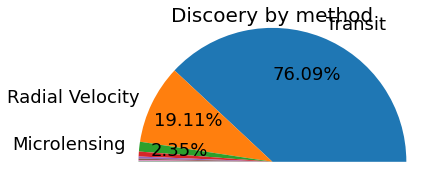

In [12]:
plt.rcParams['figure.figsize']=(6,12)
data=df.groupby(['discoverymethod']).size().sort_values(ascending=False)

def autopct_fun(x):
    if x<1:
        return None
    else:
        return '%.2f%%'%(2*x)
    
plt.pie(x=.5*data/np.sum(data),
        labels=list(data.index[:3])+['']*(len(data)-3),
        autopct=autopct_fun,
        pctdistance=.7,
        textprops=dict(fontsize=18))
          
plt.ylim(.5,1)
plt.title('Discoery by method')

|Method | Mean  |Theory
|--- |--- |---|
|Transit |凌日|当行星运行至恒星和观察者之间时，可以观测到恒星圆盘上有一个小黑点
Radial Velocity|径向速度 |由于行星的引力拖拉而产生的恒星摆动，通过观察恒星摆动从而推测行星的参数
Microlensing |微重力透镜 |从遥远距离恒星射来的光线通过行星时会发生弯曲的现象，利用此原理发现的行星

Text(0.5, 1.0, 'Percent Distribution of Mass of Planet')

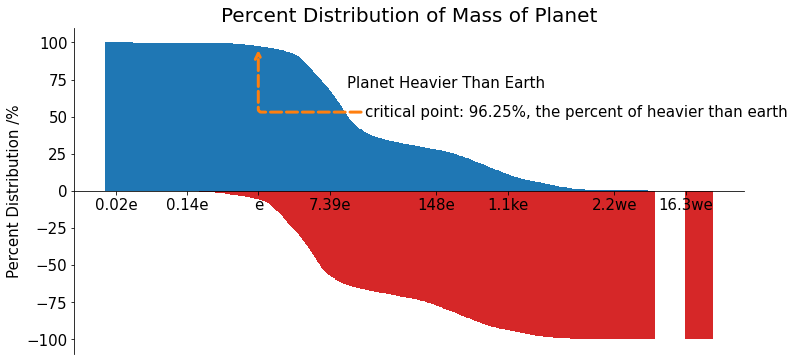

In [13]:
plt.rcParams['figure.figsize']=(12,6)

def gt_Percent(x,array):
    return 100*np.sum(array>=x)/len(array)

def lt_Percent(x,array):
    return -1*100*np.sum(array<x)/len(array)


data=df[['pl_bmasse']].copy()
data.dropna(inplace=True)
data['gt_pl_bmasse']=data['pl_bmasse'].apply(lambda x: gt_Percent(x,data['pl_bmasse']))
data['lt_pl_bmasse']=data['pl_bmasse'].apply(lambda x: lt_Percent(x,data['pl_bmasse']))
data=data.sort_values(['gt_pl_bmasse'],ascending=False)

plt.bar(np.log(data['pl_bmasse']),data['gt_pl_bmasse'],color='tab:blue')
plt.bar(np.log(data['pl_bmasse']),data['lt_pl_bmasse'],color='tab:red')


ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
plt.xticks(
    [-4,-2,0,2,5,7,10,12],
    ['0.02e','0.14e','e','7.39e','148e','1.1ke','2.2we','16.3we']
)
plt.text(2.5,70, "Planet Heavier Than Earth",fontsize=15,ha='left')
plt.ylabel('Percent Distribution /%')
plt.annotate(
    s='critical point: 96.25%, the percent of heavier than earth',
    xy=[0,96.255558],xytext=[3,50],fontsize=15,
    arrowprops=dict(
        arrowstyle="->",
        lw=3,
        ls='--',
        color='tab:orange',
        connectionstyle="angle,angleA=0,angleB=90,rad=3"
    )
)
plt.title('Percent Distribution of Mass of Planet')

### Distribution by Mass

Text(0.5, 1.0, 'Mass of Plane Distribution')

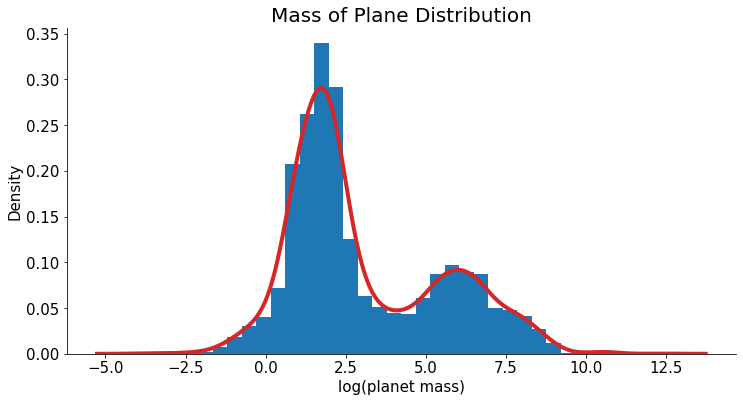

In [15]:
import seaborn as sns
plt.rcParams['figure.figsize']=(12,6)

data=df[['pl_bmasse']].copy()
data.dropna(inplace=True)
x=np.log(data['pl_bmasse'])

sns.distplot(x,color='tab:blue',hist_kws=dict(alpha=1),kde_kws=dict(color='tab:red',lw=4))
plt.xlabel('log(planet mass)')
plt.ylabel('Density')
plt.title('Mass of Plane Distribution')

### Orbital vs Mass

Text(0.5, 1.0, 'Mass and Orbital Period of Planet by Discoverymethod')

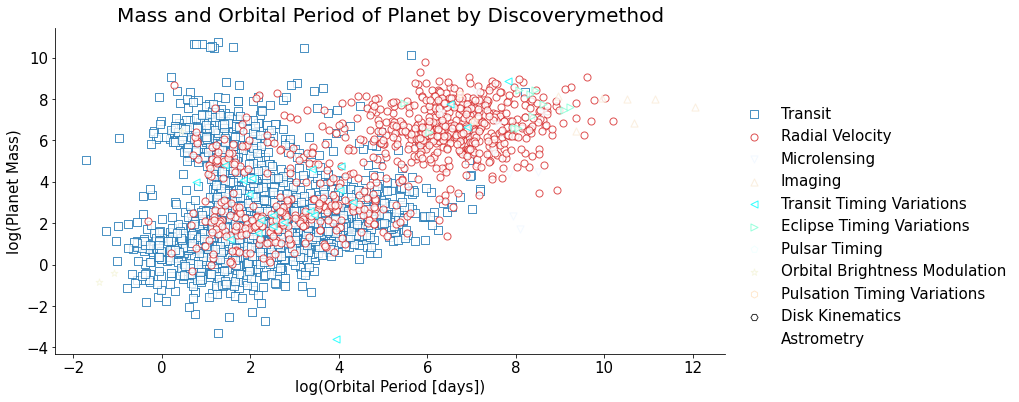

In [16]:
import matplotlib.colors as cs
plt.rcParams['figure.figsize']=(12,6)

data=df[['pl_orbper','pl_bmasse','discoverymethod','sy_dist']].copy()
data.dropna(inplace=True)

methods=['Transit', 'Radial Velocity', 'Microlensing', 'Imaging',
           'Transit Timing Variations', 'Eclipse Timing Variations',
           'Pulsar Timing', 'Orbital Brightness Modulation',
           'Pulsation Timing Variations', 'Disk Kinematics', 'Astrometry']

colors=['tab:blue','tab:red']+[value for value in cs.CSS4_COLORS.values()]

markers='sov^<>p*hH+xDd|.,1234'
for i,method in enumerate(methods):
    pdata=data.loc[data['discoverymethod']==method]
    plt.scatter(
        np.log(pdata['pl_orbper']),
        np.log(pdata['pl_bmasse']),
        alpha=0.8,
        label=method,
        s=50,
        marker=markers[i],
        edgecolor=colors[i],
        facecolor='white',
        color=colors[i])

plt.legend(loc="upper left",bbox_to_anchor=(1.0,0.8))
plt.xlabel('log(Orbital Period [days])')
plt.ylabel('log(Planet Mass)')
plt.title('Mass and Orbital Period of Planet by Discoverymethod')

### Distance vs Mass

Text(0.5, 1.0, 'Mass and Distance of Planet by Discoverymethod')

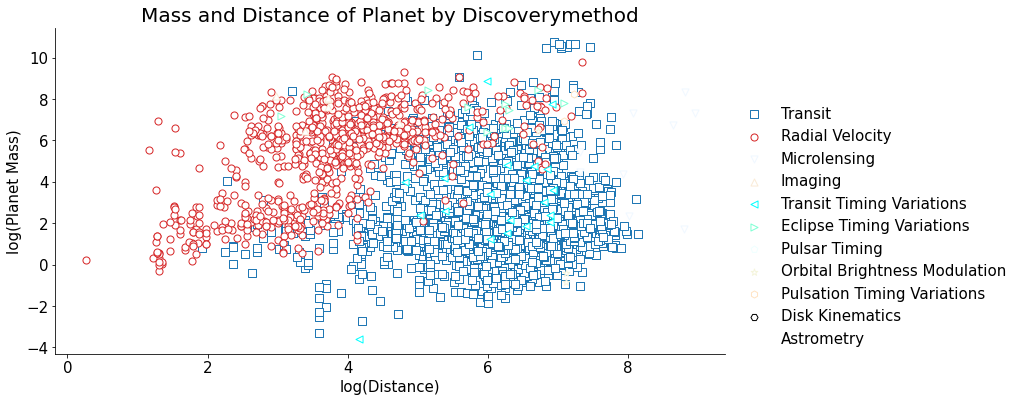

In [17]:
plt.rcParams['figure.figsize']=(12,6)

data=df[['pl_orbper','pl_bmasse','discoverymethod','sy_dist']].copy()
data.dropna(inplace=True)

methods=['Transit', 'Radial Velocity', 'Microlensing', 'Imaging',
           'Transit Timing Variations', 'Eclipse Timing Variations',
           'Pulsar Timing', 'Orbital Brightness Modulation',
           'Pulsation Timing Variations', 'Disk Kinematics', 'Astrometry']

colors=['tab:blue','tab:red']+[value for value in cs.CSS4_COLORS.values()]
markers='sov^<>p*hH+xDd|.,1234'
for i,method in enumerate(methods):
    pdata=data.loc[data['discoverymethod']==method]
    plt.scatter(
        np.log(pdata['sy_dist']),
        np.log(pdata['pl_bmasse']),
        label=method,
        s=50,
        marker=markers[i],
        edgecolors=colors[i],
        color='white',
    )

plt.legend(loc="upper left",bbox_to_anchor=(1.0,0.8))
plt.xlabel('log(Distance)')
plt.ylabel('log(Planet Mass)')
plt.title('Mass and Distance of Planet by Discoverymethod')

### Mass vs Radius

$$mass=\rho V=\rho (\frac{4}{3} \Pi R^3)$$

$$log(mass)= 3log(R)+log(\frac{4}{3} \rho \Pi) $$

[2.34189301 0.0225464 ]


Text(0.5, 1.0, 'Mass and Radius of Planet Distribution')

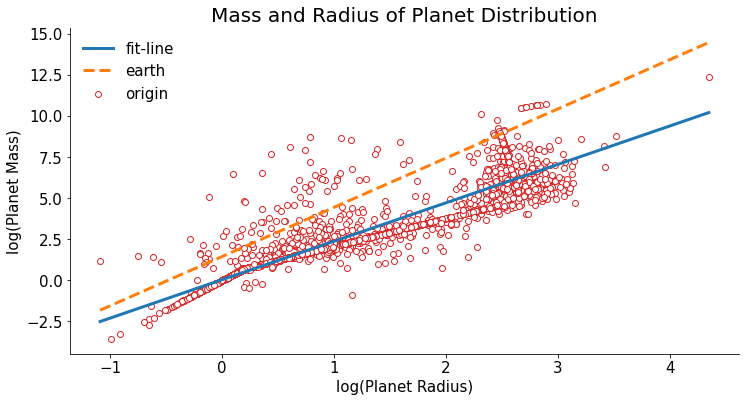

In [18]:
plt.rcParams['figure.figsize']=(12,6)

data=df[['pl_rade','pl_bmasse','discoverymethod','sy_dist']].copy()
data.dropna(inplace=True)
x,y=np.log(data['pl_rade']),np.log(data['pl_bmasse'])

plt.scatter(x,y,color='white',edgecolors='tab:red',label='origin')
fit_xy=np.polyfit(x,y,1)
x_fitvalue=np.linspace(x.min(),x.max(),100)
y_fitvalue=np.polyval(fit_xy,x_fitvalue)
plt.plot(x_fitvalue,y_fitvalue,lw=3,label='fit-line')
print(fit_xy)
x_fitvalue=np.linspace(x.min(),x.max(),100)
y_fitvalue=3*x_fitvalue+np.log(4/3*np.pi*1.0)
plt.plot(x_fitvalue,y_fitvalue,lw=3,ls='--',label='earth')

plt.legend()
plt.xlabel('log(Planet Radius)')
plt.ylabel('log(Planet Mass)')
plt.title('Mass and Radius of Planet Distribution')

$$log(mass)= 2.342 \times log(R)+0.022546 $$

$$ \rho = \rho_{earth} \times \frac{e^{0.022546}}{ \frac{4}{3}\Pi } = 0.244179  \rho_{earth} $$

## Stellar Mass vs Radius

Text(0.5, 1.0, 'Mass and Radius of Stellar Distribution')

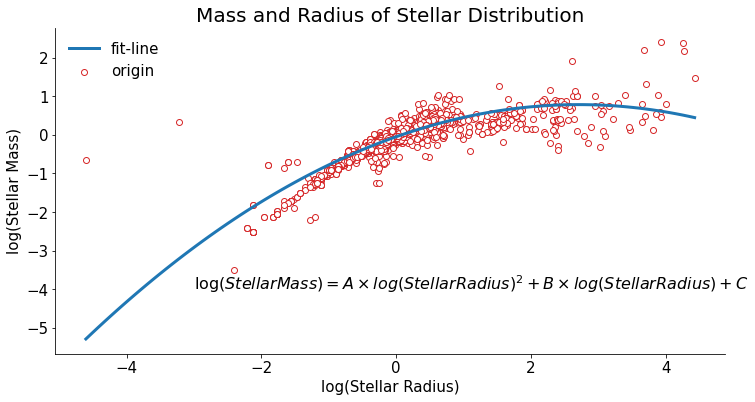

In [19]:
plt.rcParams['figure.figsize']=(12,6)

data=df[['st_rad','st_mass']].copy()
data.dropna(inplace=True)
x,y=np.log(data['st_rad']),np.log(data['st_mass'])
plt.scatter(x,y,color='white',edgecolors='tab:red',label='origin')
fit_xy=np.polyfit(x,y,2)
x_fitvalue=np.linspace(x.min(),x.max(),100)
y_fitvalue=np.polyval(fit_xy,x_fitvalue)
plt.plot(x_fitvalue,y_fitvalue,lw=3,label='fit-line')

plt.legend()
plt.xlabel('log(Stellar Radius)')
plt.ylabel('log(Stellar Mass)')
plt.text(-3, -4,'$\log(Stellar Mass)=A \\times log(Stellar Radius)^2+B \\times log(Stellar Radius)+C$',fontsize=16)
plt.title('Mass and Radius of Stellar Distribution')

### Gravity vs Radius

Text(0.5, 1.0, 'Stellar Surface Gravity and Radius of Stellar Distribution')

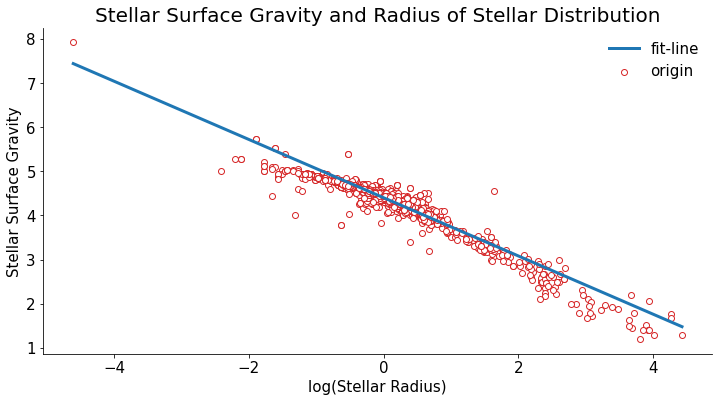

In [20]:
plt.rcParams['figure.figsize']=(12,6)

data=df[['st_rad','st_logg']].copy()
data.dropna(inplace=True)
x,y=np.log(data['st_rad']),np.array(data['st_logg'])
plt.scatter(x,y,
            color='white',edgecolors='tab:red',label='origin')

fit_xy=np.polyfit(x,y,1)
x_fitvalue=np.linspace(x.min(),x.max(),100)
y_fitvalue=np.polyval(fit_xy,x_fitvalue)
plt.plot(x_fitvalue,y_fitvalue,lw=3,label='fit-line')

plt.legend()
plt.xlabel('log(Stellar Radius)')
plt.ylabel('Stellar Surface Gravity')
plt.title('Stellar Surface Gravity and Radius of Stellar Distribution')

### Feature Distribution

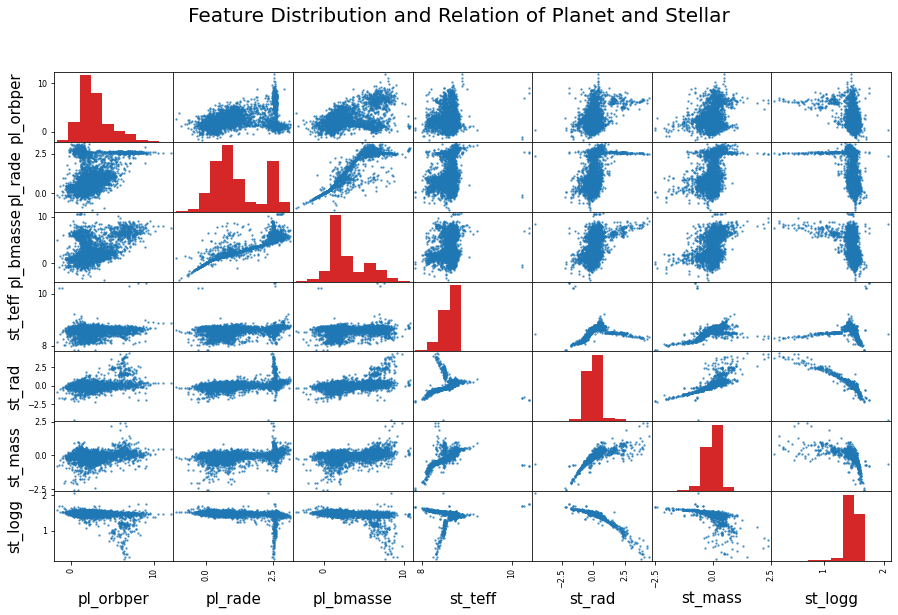

In [21]:
data=df[['pl_orbper','pl_rade','pl_bmasse',
           'st_teff','st_rad','st_mass','st_logg']].copy()
data.dropna(inplace=True)
data=data.applymap(lambda x: np.log(x))
fig,ax=plt.subplots(1,1,figsize=(15, 9))
axes=pd.plotting.scatter_matrix(
    frame=data,
    marker='.',
    s=8,
    ax=ax,
    alpha=0.6,
    edgecolor='tab:blue',
    cmap=plt.cm.RdBu,
    hist_kwds={'color':'tab:red'}
)

for ax in axes.ravel():
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

fig.suptitle(
    'Feature Distribution and Relation of Planet and Stellar',fontsize=20)

fig.align_xlabels()
fig.align_ylabels()

### Terrestrial

Kepler-452 b


Text(0.7, 0.4, 'Kepler-452 b')

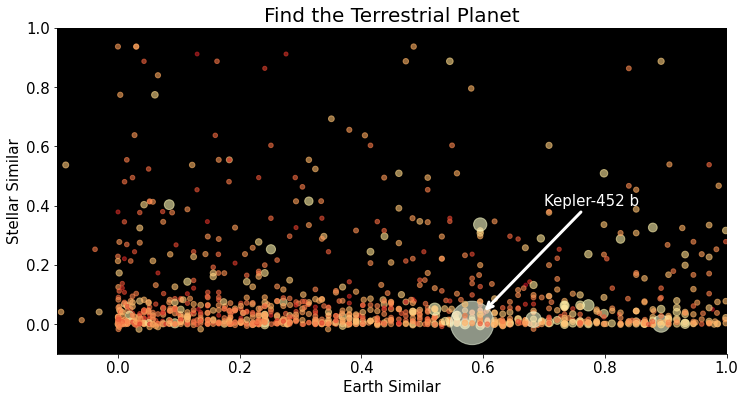

In [22]:
fig,ax=plt.subplots(1,1)
ax.set(facecolor='k')
data=df[['pl_orbper','pl_rade','pl_bmasse','st_rad','st_mass']].copy()
data.dropna(inplace=True)
data=data.applymap(lambda x: np.log(x))

data['Earth Similar']=data['pl_rade']*data['pl_bmasse']
data['Stellar Similar']=data['st_rad']*data['st_mass']

def peroid_adjust(array,adjust_value):
    array = np.abs(array-adjust_value)
    return 1.0/array

data['peroid_similar']=peroid_adjust(data['pl_orbper'],np.log(365))

plt.scatter(
    x=data['Earth Similar'],
    y=data['Stellar Similar'],
    c=data['pl_orbper'],
    s=100*data['peroid_similar'],
    alpha=0.6,
    cmap=plt.cm.RdYlBu,
)
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.xlabel('Earth Similar')
plt.ylabel('Stellar Similar')
plt.title('Find the Terrestrial Planet')

target=data.loc[
    (data['Earth Similar']>-0.1) &
    (data['Earth Similar']<1) &
    (data['Stellar Similar']>-0.1) &
    (data['Stellar Similar']<1)
]
target_index=target.sort_values(['peroid_similar'],ascending=False).index[0]
print(df.iloc[target_index]['pl_name'])

plt.annotate(
    s=df.iloc[target_index]['pl_name'],
    xy=[0.6,0.04],
    xytext=[0.7,0.4],
    fontsize=15,
    color='white',
    arrowprops=dict(
        arrowstyle="->",
        lw=3,
        ls='-',
        color='white',
    )
)

In [23]:
df.iloc[target_index]

loc_rowid                  3115
pl_name            Kepler-452 b
hostname             Kepler-452
discoverymethod         Transit
disc_year                  2015
disc_facility            Kepler
pl_orbper               384.843
pl_rade                    1.63
pl_bmasse                  3.29
pl_orbeccen                 0.0
pl_eqt                    265.0
st_spectype                  G2
st_teff                  5757.0
st_rad                     1.11
st_mass                    1.04
st_logg                    4.32
glat                   9.987698
glon                   77.86458
sy_dist                 551.727
Name: 3114, dtype: object

### Kepler 452b position

Text(0.5, 1.0, 'Where Does the Kepler-452 b Locate ?')

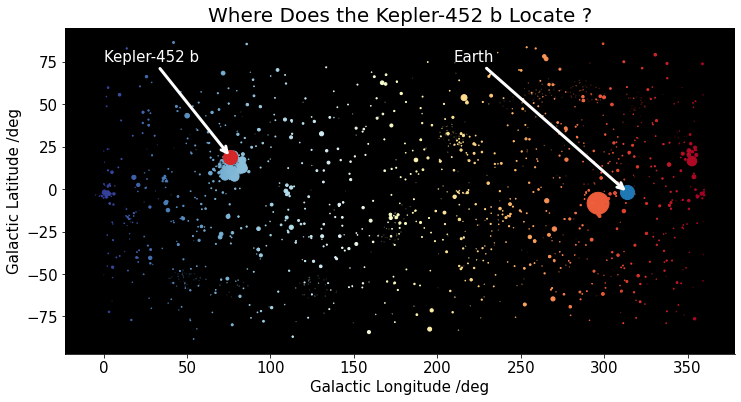

In [24]:
fig,ax=plt.subplots(1,1,figsize=(12, 6))
ax.set(fc='black')

Kepler_index = 3115

plt.scatter(
    x='glon',
    y='glat',
    s=df['pl_bmasse']*0.002,
    c='glon',
    cmap=plt.cm.RdYlBu_r,
    data=df
)
plt.scatter(
    x='glon',
    y='glat',
    s=200,
    c='tab:red',
    data=df.iloc[Kepler_index]
)
#Nearest Earth Position
plt.scatter(
    x=313.9399,
    y=-1.927165,
    s=200,
    c='tab:blue',
)
# Earth
plt.annotate(
    s='Earth',
    xy=[313.9399, -1.927165],
    xytext=[210, 75],
    fontsize=15,
    color='white',
    arrowprops=dict(
        arrowstyle="->",
        lw=3,
        ls='-',
        color='white',
    )
)
# Kepler-452 b
plt.annotate(
    s='Kepler-452 b',
    xy=[df.iloc[Kepler_index]['glon'], df.iloc[Kepler_index]['glat']],
    xytext=[0, 75],
    fontsize=15,
    color='white',
    arrowprops=dict(
        arrowstyle="->",
        lw=3,
        ls='-',
        color='white',
    )
)
plt.xlabel('Galactic Longitude /deg')
plt.ylabel('Galactic Latitude /deg')
plt.title('Where Does the Kepler-452 b Locate ?')

### Plantes Clusters

In [25]:
def distance_L(fea_1, fea_2, center_x, center_y, data):
    x_x = np.power(data[fea_1]-center_x, 2)
    y_y = np.power(data[fea_2]-center_y, 2)
    return np.array(np.sqrt(x_x+y_y))

In [26]:
def train_centers(fea_1, fea_2, centers, data):

    (center1_x, center1_y), (center2_x, center2_y) = centers

    distance_1 = distance_L(fea_1, fea_2, center1_x, center1_y, data)
    distance_2 = distance_L(fea_1, fea_2, center2_x, center2_y, data)

    center1_x = data.loc[distance_1 < distance_2, fea_1].mean()
    center1_y = data.loc[distance_1 < distance_2, fea_2].mean()

    center2_x = data.loc[distance_1 > distance_2, fea_1].mean()
    center2_y = data.loc[distance_1 > distance_2, fea_2].mean()

    return (center1_x, center1_y), (center2_x, center2_y)

In [27]:
train_centers('pl_bmasse', 'pl_orbper', centers=((3, 3), (8, 8)), data=data)

((2.3541624629996307, 2.301455314750055),
 (6.918231676165206, 6.648578794157392))

In [28]:
def pred_centers(x, y, centers):
    
    (center1_x, center1_y), (center2_x, center2_y) = centers
    
    d1 = np.sqrt(np.power(x-center1_x, 2)+np.power(y-center1_y, 2))
    
    d2 = np.sqrt(np.power(x-center2_x, 2)+np.power(y-center2_y, 2))

    pred_classes = np.array(d1 < d2, dtype='int')
    
    return pred_classes

In [29]:
x = np.array([1, 1, 1, 5, 5, 5, 10, 10, 10])
y = np.array([1, 5, 10, 1, 5, 10, 1, 5, 10])
pred_centers(x, y, [[3, 6], [9, 5]])

array([1, 1, 1, 1, 1, 1, 0, 0, 0])

In [30]:
np.random.seed(5)
fea_1,fea_2='pl_bmasse','pl_orbper'
epochs=15
centers=np.random.randint(low=3,high=10,size=(2, 2))
centers_all=[centers]
for i in range(epochs):
    centers=train_centers(fea_1,fea_2,centers,data=data)
    centers_all.append(centers)

centers_all[:2]

[array([[6, 9],
        [8, 9]]),
 ((2.5309089105743983, 2.6198973730635213),
  (7.90410233251154, 5.314514201115664))]

Text(0.5, 1.0, 'Planet Cluster by Mass and Orbital Period after Train Epoch 14')

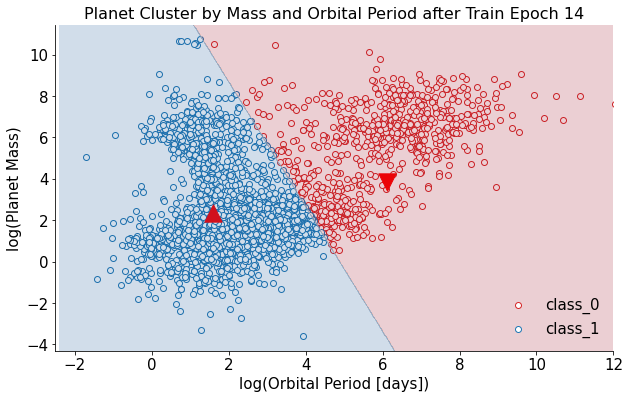

In [31]:
plt.rcParams['figure.figsize']=(10,6)

epoch=epochs-1
classes=pred_centers(data['pl_orbper'],data['pl_bmasse'],centers_all[epoch])
plt.scatter('pl_orbper', 'pl_bmasse',
            data=data.loc[classes == 0], color='white', edgecolors='tab:red', label='class_0')
plt.scatter('pl_orbper', 'pl_bmasse',
            data=data.loc[classes == 1], color='white', edgecolors='tab:blue', label='class_1')

(center1_x, center1_y), (center2_x, center2_y) = centers_all[epoch]
plt.scatter(center1_x, center1_y, marker='^', s=300, c='r')
plt.scatter(center2_x, center2_y, marker='v', s=300, c='r')

ax = plt.gca()
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
x=np.linspace(xmin, xmax, 1000)
y=np.linspace(ymin, ymax, 1000)

X,Y=np.meshgrid(x,y)
Z=pred_centers(X,Y,centers_all[epoch])

plt.contourf(X,Y,Z,cmap=plt.cm.RdBu,alpha=0.2)
plt.xlim(-2.5,12)
plt.legend()
plt.xlabel('log(Orbital Period [days])')
plt.ylabel('log(Planet Mass)')
plt.title('Planet Cluster by Mass and Orbital Period after Train Epoch %d' %epoch,fontsize=16)

Text(0.5, 1.0, 'Mass and Orbital Period of Planet Distribution')

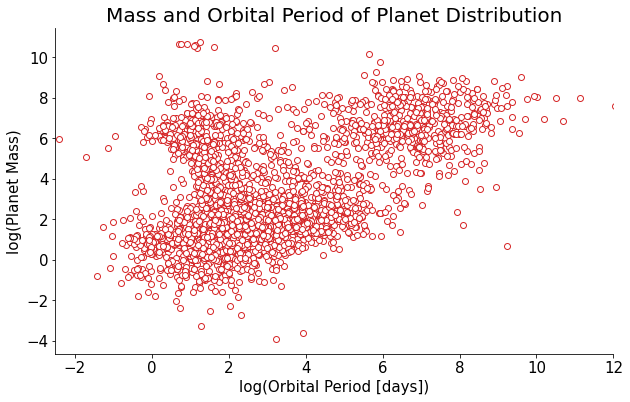

In [32]:
plt.rcParams['figure.figsize']=(10,6)

data=df[['pl_bmasse','pl_orbper']].copy()
data.dropna(inplace=True)
data=data.apply(lambda x: np.log(x))

plt.scatter('pl_orbper','pl_bmasse',data=data,
            color='white',edgecolors='tab:red')
plt.xlim(-2.5,12)
plt.xlabel('log(Orbital Period [days])')
plt.ylabel('log(Planet Mass)')
plt.title('Mass and Orbital Period of Planet Distribution')